In [422]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf 


In [372]:
dt=pd.read_csv("delivery_time.csv")

In [373]:
dt=dt.rename({"Delivery Time": "deliver_time","Sorting Time":"sorting_time"},axis=1)

In [374]:
dt

,deliver_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA and data visualisation

In [375]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   deliver_time  21 non-null     float64
 1   sorting_time  21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


              deliver_time  sorting_time
deliver_time      1.000000      0.825997
sorting_time      0.825997      1.000000


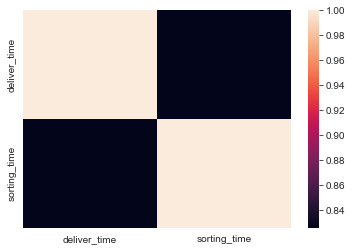

In [376]:
#checking for corelation 
sns.heatmap(dt.corr())
print(dt.corr())

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='deliver_time', ylabel='Density'>

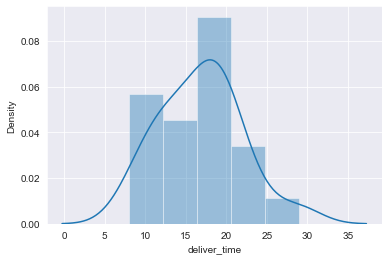

In [377]:
#visually representing  normality of distribution 
sns.set_style("darkgrid")
sns.distplot(dt["deliver_time"])


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

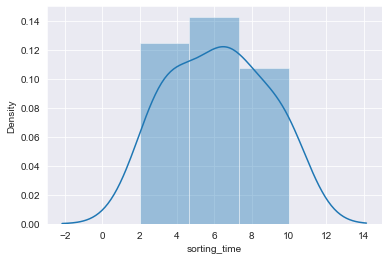

In [378]:
sns.distplot(dt['sorting_time'])

# corelation analysis

In [379]:
dt.head()

,deliver_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='deliver_time', ylabel='sorting_time'>

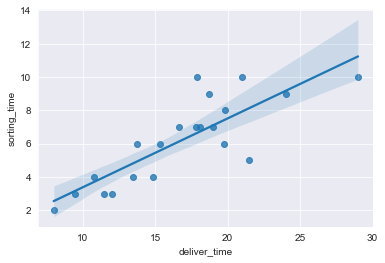

In [380]:
sns.regplot(dt["deliver_time"],dt["sorting_time"])

# vif

In [417]:
#cheking the VIF
rsq_dt = smf.ols('deliver_time~sorting_time',data=dt).fit().rsquared  
vif_dt = 1/(1-rsq_dt) 
print("VIF : ", vif_dt)

VIF :  3.147340955621938


# model building

In [382]:
model= smf.ols("deliver_time~sorting_time",data=dt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliver_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           3.98e-06
Time:                        01:29:19   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [383]:
model2= smf.ols("deliver_time~np.log(sorting_time)",data=dt).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliver_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           2.64e-06
Time:                        01:29:19   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [384]:
model3= smf.ols("np.log(deliver_time)~np.log(sorting_time)",data=dt).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(deliver_time)   R-squared:                       0.772
Model:                              OLS   Adj. R-squared:                  0.760
Method:                   Least Squares   F-statistic:                     64.39
Date:                  Wed, 12 Oct 2022   Prob (F-statistic):           1.60e-07
Time:                          01:29:20   Log-Likelihood:                 10.291
No. Observations:                    21   AIC:                            -16.58
Df Residuals:                        19   BIC:                            -14.49
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [385]:
model4= smf.ols("np.exp(deliver_time)~sorting_time",data=dt).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.exp(deliver_time)   R-squared:                       0.119
Model:                              OLS   Adj. R-squared:                  0.073
Method:                   Least Squares   F-statistic:                     2.572
Date:                  Wed, 12 Oct 2022   Prob (F-statistic):              0.125
Time:                          01:29:20   Log-Likelihood:                -604.98
No. Observations:                    21   AIC:                             1214.
Df Residuals:                        19   BIC:                             1216.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5.324e+11   4.84e+11     -1.099      0.285   -1.55e+12    4.81e+11
sorting_time  1.165e+11   7.26e+10      1.604      0.125   -3.55e+10    2.69e+11
==============================================================================
Omnibus:                       44.249   Durbin-Watson:                   2.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.022
Skew:                           3.442   Prob(JB):                     1.47e-36
Kurtosis:                      14.883   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [386]:
model5= smf.ols("np.exp(deliver_time)~np.exp(sorting_time)",data=dt).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.exp(deliver_time)   R-squared:                       0.274
Model:                              OLS   Adj. R-squared:                  0.235
Method:                   Least Squares   F-statistic:                     7.156
Date:                  Wed, 12 Oct 2022   Prob (F-statistic):             0.0150
Time:                          01:29:20   Log-Likelihood:                -602.95
No. Observations:                    21   AIC:                             1210.
Df Residuals:                        19   BIC:                             1212.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -6.244e+10   1.89e+11     -0.331      0.744   -4.57e+11    3.32e+11
np.exp(sorting_time)   5.78e+07   2.16e+07      2.675      0.015    1.26e+07    1.03e+08
==============================================================================
Omnibus:                       29.198   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.647
Skew:                           2.162   Prob(JB):                     4.56e-16
Kurtosis:                      10.877   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

model 3 shows the highest r-squared ( R-squared:0.772), hence we choose it as the best model .

# model testing

In [387]:
print("model parameters : ",model.params)
print(" ")
print("model3 parameters : ",model3.params)

model parameters :  Intercept       6.582734
sorting_time    1.649020
dtype: float64
 
model3 parameters :  Intercept               1.741987
np.log(sorting_time)    0.597522
dtype: float64


In [388]:
print("model t-values : ",model.tvalues)
print(" ")
print("model3 t-values : ",model.tvalues)

model t-values :  Intercept       3.823349
sorting_time    6.387447
dtype: float64
 
model3 t-values :  Intercept       3.823349
sorting_time    6.387447
dtype: float64


In [389]:
print("model p-values : ",model.pvalues)
print(" ")
print("model3 p-values : ",model3.pvalues)


model p-values :  Intercept       0.001147
sorting_time    0.000004
dtype: float64
 
model3 p-values :  Intercept               5.921137e-11
np.log(sorting_time)    1.601539e-07
dtype: float64


# model predictions

In [390]:
pred_data=pd.Series([10,18,4,56,73,9])

In [391]:
pred_data=pd.DataFrame(pred_data,columns=["sorting_time"])

In [392]:
pred_data

,sorting_time
0,10
1,18
2,4
3,56
4,73
5,9


In [393]:
print("  first model prediction :", model.predict(pred_data))
print(" developed model prediction : ", model3.predict(pred_data))

  first model prediction : 0     23.072933
1     36.265092
2     13.178814
3     98.927848
4    126.961186
5     21.423913
dtype: float64
 developed model prediction :  0    3.117833
1    3.469049
2    2.570329
3    4.147225
4    4.305632
5    3.054878
dtype: float64


In [394]:
 print(model3.predict())

[3.1178331  2.57032892 2.81260338 3.05487783 3.1178331  2.81260338
 2.90471185 2.39843246 3.1178331  3.05487783 2.98449984 2.57032892
 2.90471185 2.39843246 2.39843246 2.57032892 2.81260338 2.90471185
 2.15615801 2.90471185 2.70366218]


# exercise 2 - salary data

In [395]:
#Salary_hike -> Build a prediction model for Salary_hike

In [396]:
sd=pd.read_csv("Salary_Data.csv")
sd

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [397]:
#checking for null values that might skew our model.
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


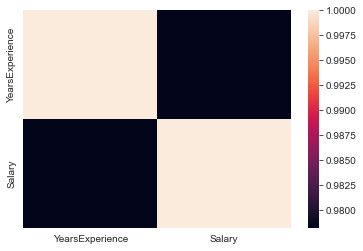

In [398]:
#checking the corelation of datas
sns.heatmap(sd.corr())
print(sd.corr())

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

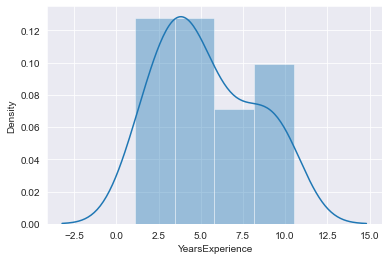

In [399]:
#check for normality  
sns.set_style("darkgrid")
sns.distplot(sd.YearsExperience)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

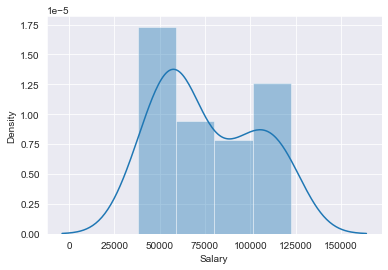

In [400]:
sns.distplot(sd.Salary)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

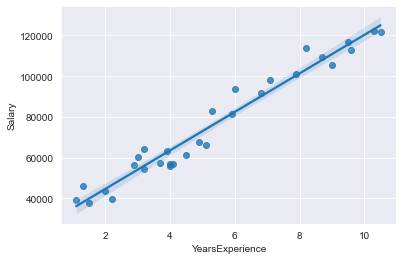

In [401]:
#regression
sns.regplot(sd.YearsExperience,sd.Salary)

# VIF

In [416]:
#cheking the VIF
rsq_sal = smf.ols('Salary~YearsExperience',data=sd).fit().rsquared  
vif_sal = 1/(1-rsq_sal) 
print("VIF : ", vif_sal)

VIF :  23.232400094036578


# model building

In [403]:

model1=smf.ols("Salary~YearsExperience",data=sd).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           1.14e-20
Time:                        01:29:23   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [404]:
model2=smf.ols("Salary~np.log(YearsExperience)",data=sd).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           3.25e-13
Time:                        01:29:23   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [405]:
model3=smf.ols("np.log(Salary)~np.log(YearsExperience)",data=sd).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           7.40e-16
Time:                        01:29:24   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [406]:
model4=smf.ols("np.log(Salary)~YearsExperience",data=sd).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           7.03e-18
Time:                        01:29:24   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

the best two models are model1(R-squared:0.957) and model4(R-squared:0.932)
hence we choose the model with higher rsquared

In [407]:
model1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [408]:
model1.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [409]:
model1.tvalues

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

In [410]:
# Finding Rsquared values
model1.rsquared , model1.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [411]:
#manually finding the salary for 3.6 years
salary=(25792.200199)+(9449.962321)*3.6
salary

59812.0645546

# predict

In [412]:
pred_data=pd.Series([7.2,4,3.6])
pred_data

0    7.2
1    4.0
2    3.6
dtype: float64

In [413]:
pred=pd.DataFrame(pred_data,columns=["YearsExperience"])



In [414]:
pred

,YearsExperience
0,7.2
1,4.0
2,3.6


In [415]:
model1.predict(pred)

0    93831.928913
1    63592.049484
2    59812.064556
dtype: float64